# Hands-on Practice for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis
    
Description of the data is provided at https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Davis

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> What does the data capture? <br>

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study that collected the data? <br>

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [2]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [3]:
davis_df.dropna(inplace=True);

In [4]:
davis_df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [5]:
davis_df.shape

(181, 6)

 <span style="color:green">Answer:</span>

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span>

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [6]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

 <span style="color:green">Answer:</span>
 

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [7]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [8]:
davis_df.describe(exclude=object)

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer:</span>

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [9]:
davis_df.describe(include=object)

,sex
count,181
unique,2
top,F
freq,99


 <span style="color:green">Answer:</span> 

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [10]:
from pandas.api.types import is_numeric_dtype
print("Mean for each attribute is:")
for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].mean())

Mean for each attribute is:
weight:
	 Mean = 66.30
height:
	 Mean = 170.15
repwt:
	 Mean = 65.68
repht:
	 Mean = 168.66


<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [11]:
from pandas.api.types import is_numeric_dtype
print("Variance for the attributes is:")
for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].var())

Variance for the attributes is:
weight:
	 Mean = 235.35
height:
	 Mean = 151.59
repwt:
	 Mean = 191.39
repht:
	 Mean = 88.26


<span style="color:red">**Question 2e:** </span> Visually examine how the attribute weight is distributed and comment if the data is Normally distributed? 

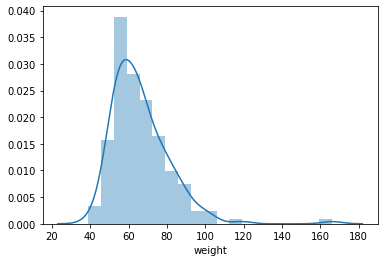

In [29]:
sns.distplot(davis_df['weight']);

 <span style="color:green">Answer:</span> 

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute height is distributed and comment if the data is Normally distributed? 

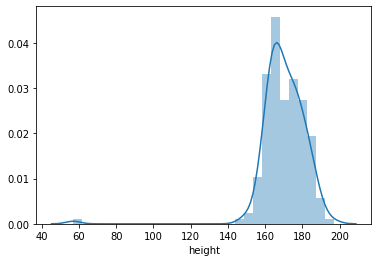

In [30]:
sns.distplot(davis_df['height']);

 <span style="color:green">Answer:</span>  

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute repwt is distributed and comment if the data is Normally distributed? 

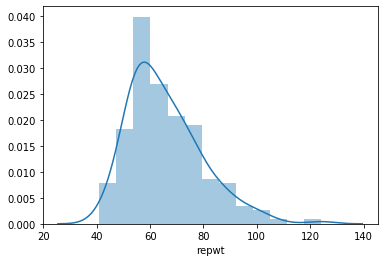

In [31]:
sns.distplot(davis_df['repwt']);

 <span style="color:green">Answer:</span>  

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute repht is distributed and comment if the data is Normally distributed? 

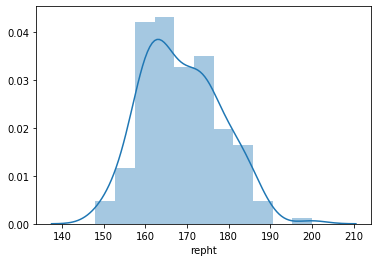

In [32]:
sns.distplot(davis_df['repht']);

 <span style="color:green">Answer:</span>  

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute sex is distributed and comment if the data is uniformly distributed? 

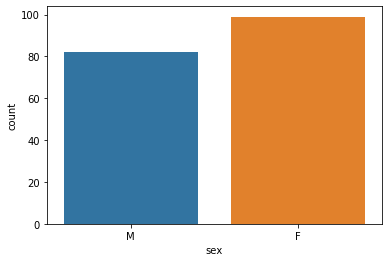

In [35]:
sns.countplot(davis_df['sex']);

 <span style="color:green">Answer:</span>  

### 3. Geometric and Probabilistic view

For this part, we will restrict to repwt and repht attributes in the davis dataset as we can only visualize 2D space.

In [36]:
davis_df_new = davis_df[['repwt','repht']]

In [37]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

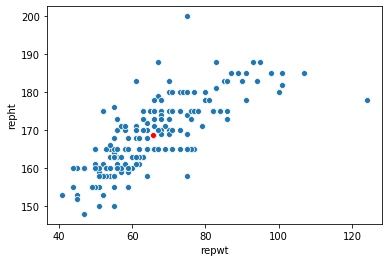

In [38]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [42]:
from sklearn.preprocessing import normalize
davis_d_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [43]:
davis_d_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

<span style="color:red">**Question 3b:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. Comment on the Geomateric view of the data in comparison to the view you observed in Question 3a. Provide a reason for the difference in the geometric views in Question 3a and 3b.

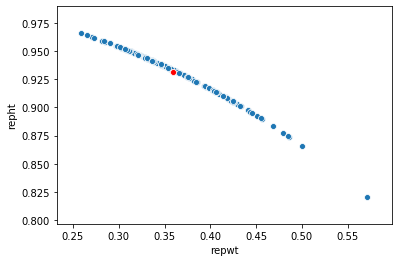

In [44]:
davis_df_new_row_norm = pd.DataFrame(davis_d_new_row_norm, columns=("repwt","repht")) 
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new_row_norm,ax=ax)
mu = np.mean(davis_df_new_row_norm.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

 <span style="color:green">Answer:</span> 

<span style="color:red">**Question 3c:** </span> Show the Probabilistic view of the data davis_df_new.

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [ ]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [ ]:
davis_df_new_col_norm[1:10,:]

<span style="color:red">**Question 3d:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. Compare the shape of the covariance structure in the Gaussian distribution with that of Question 3c and comment if column normalization has affected the shape of the covariance structure.

<span style="color:green">Answer:</span>  

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> What is the covariance matrix?

<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> 



<span style="color:red">**Question 4c:** </span> Which pairs of attributes are highly correlated?

<span style="color:green">Answer: </span> 


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 4e:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> 

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [ ]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 5d:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **dimensionality reduction** in that case? What limitations does your approach have?

<span style="color:green">Answer:</span> 

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 4a?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 4b?

<span style="color:green">Answer:</span> 

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [ ]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [ ]:
Blobs_X.shape

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [ ]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [ ]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [ ]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span>

### 8. Singular Value Decomposition

<span style="color:red">**Question 8a:** </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

<span style="color:red">**Question 8b:** </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [ ]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [ ]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [ ]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

In [ ]:
sns.heatmap(data,vmin=0, vmax=7)

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> 

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [ ]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [ ]:
digits.data.shape

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [ ]:
digits.target

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [ ]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [ ]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [ ]:
X

In [ ]:
X.shape

In [ ]:
y

In [ ]:
y.shape

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and identify one attribute that can separate the 3s from 8s. Also comment on (approximately) how many mistakes would be committed if this attribute is used for projection in LDA.

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span>

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment how many points will be wrongly predicted based on this projection.

<span style="color:green">Answer:</span>